# Taller 1: operaciones elementales sobre imágenes


## Cargue y visualice las imágenes.

In [2]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

In [3]:
import cv2

imagen_MUSCLE = cv2.imread(PATH_IMAGES + "MUSCLE.png", cv2.IMREAD_GRAYSCALE)
imagen_SPOT= cv2.imread(PATH_IMAGES + "SPOT.png", cv2.IMREAD_GRAYSCALE)

Visualizamos las imágenes con matplotlib. Se instala en caso de que no esté instalada.

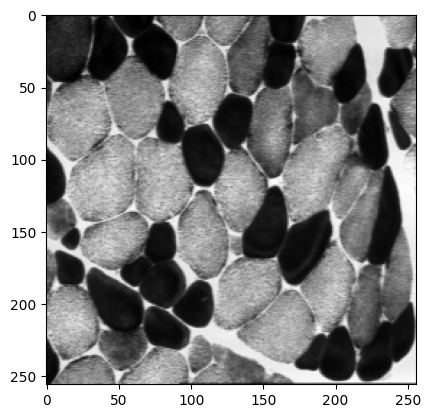

In [4]:
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.imshow(imagen_MUSCLE, cmap='gray')
plt.show()

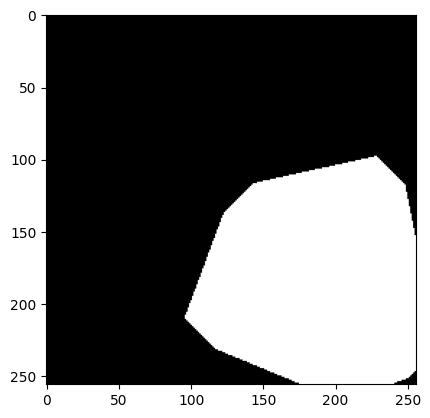

In [5]:
plt.imshow(imagen_SPOT, cmap='gray')
plt.show()

In [8]:
imagen_OR = cv2.bitwise_or(imagen_MUSCLE, imagen_SPOT)
imagen_AND = cv2.bitwise_and(imagen_MUSCLE, imagen_SPOT)
imagen_XOR = cv2.bitwise_xor(imagen_MUSCLE, imagen_SPOT)

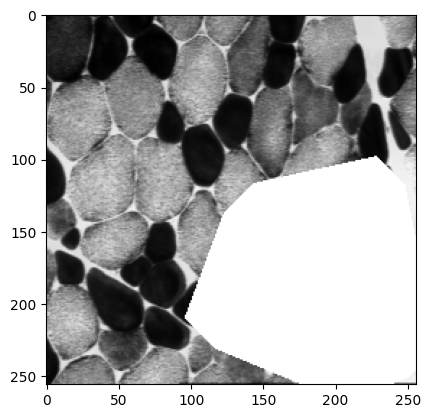

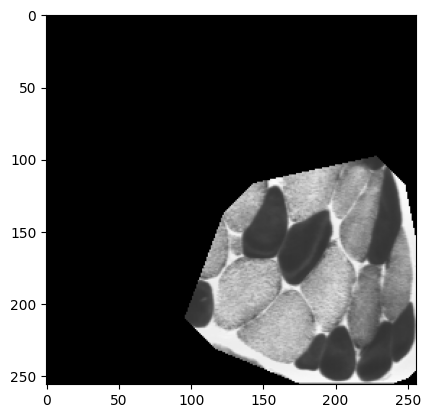

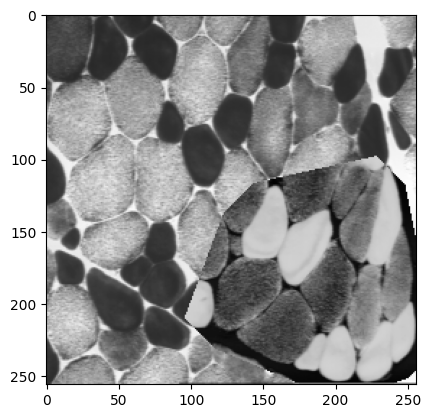

In [9]:
plt.imshow(imagen_OR, cmap='gray')
plt.show()
plt.imshow(imagen_AND, cmap='gray')
plt.show()
plt.imshow(imagen_XOR, cmap='gray')
plt.show()

In [15]:
print("Un pixel donde SPOT es 255", imagen_SPOT[170, 170])
print("El mismo pixel en MUSCLE", imagen_MUSCLE[170, 170])
print("El mismo pixel en la operacion XOR", imagen_XOR[170, 170])

Un pixel donde SPOT es 255 255
El mismo pixel en MUSCLE 52
El mismo pixel en la operacion XOR 203


Para analizar las imágenes, consideramos las siguientes definiciones:

- Un AND bit a bit es verdadero si y sólo si ambos píxeles son mayores que cero.
- Un OR bit a bit es verdadero si cualquiera de los dos píxeles es mayor que cero.
- Un XOR bit a bit es verdadero si y solo si uno de los dos píxeles es mayor que cero, pero no ambos.

De esta forma, podemos ver lo siguiente:

1. En la imagen del OR vemos la imagen del músculo y una mancha blanca correspondiente al spot de la otra imagen. La parte blanca queda así porque la operación toma el mayor valor entre los píxeles, en este caso toma el valor de 255.

2. En la imagen del AND solo se muestra una sección de la imagen del músculo, que es donde los píxeles de ambas imágenes son mayores a 0. El resto de la imagen se ve negra, haciendo el efecto de un recorte o énfasis a un "spot" de la imagen.

3. La imagen del XOR es un poco más compleja. En la parte donde la imagen spot tiene valores de 0 (negro), se ve la imagen del músculo exactamente igual. En la parte donde spor es 255 (blanco), parece que se tomara el negativo de la imagen. Lo que está pasando exactamente es que queda el valor de la resta entre 255 y el valor del pixel en la misma posición para muscle. Como se puede ver en los prints anteriores, en el pixel (170,170) SPOT tiene un valor de 255, muscle un valor de 52 y XOR tiene un valor de 255-53=202.

## Invierta el orden de los operandos y efectúe nuevamente las operaciones OR, AND y XOR. ¿Cuál es su conclusión? Visualice los resultados.

In [16]:
imagen_OR2 = cv2.bitwise_or(imagen_SPOT, imagen_MUSCLE)
imagen_AND2 = cv2.bitwise_and(imagen_SPOT, imagen_MUSCLE)
imagen_XOR2 = cv2.bitwise_xor(imagen_SPOT, imagen_MUSCLE)

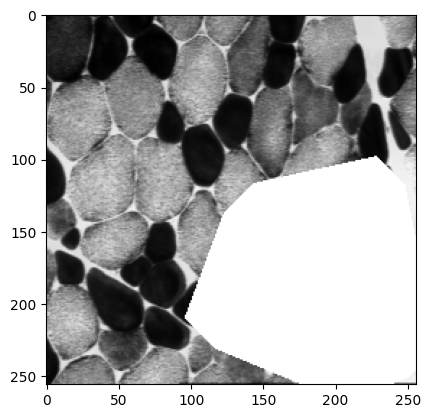

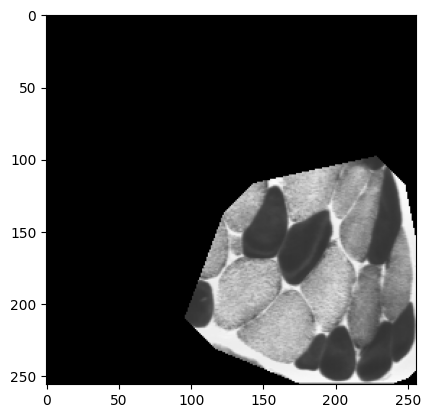

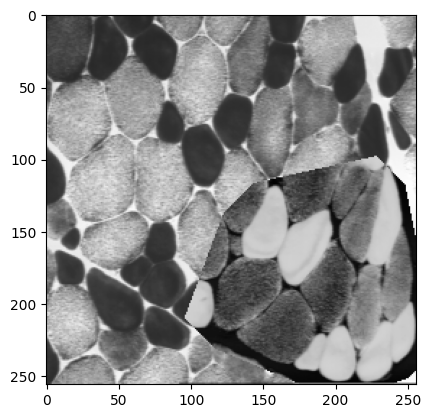

In [18]:
plt.imshow(imagen_OR2, cmap='gray')
plt.show()
plt.imshow(imagen_AND2, cmap='gray')
plt.show()
plt.imshow(imagen_XOR2, cmap='gray')
plt.show()

Todas las operaciones quedan igual, a pesar de cambiar el orden de los operandos, dado que son conmutativas.

## Aplique la operación NOT sobre la imagen muscle.png. La operación NOT puede realizarse a través de la operación XOR. Para esto se utiliza una imagen constante de valor máximo (255) y se efectúa la operación XOR con la imagen original (NOT = 255 XOR I).  Explique el resultado y visualícelo.

In [21]:
import numpy as np
imagen_255 = np.full(imagen_MUSCLE.shape, 255, dtype=np.uint8)

In [25]:
imagen_muscle_NEG = cv2.bitwise_xor(imagen_255,imagen_MUSCLE)

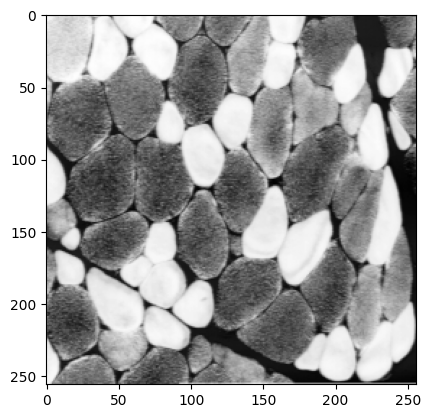

In [24]:
plt.imshow(imagen_muscle_NEG, cmap='gray')
plt.show()

In [26]:
imagen_muscle_NEG_2 = cv2.bitwise_not(imagen_MUSCLE)

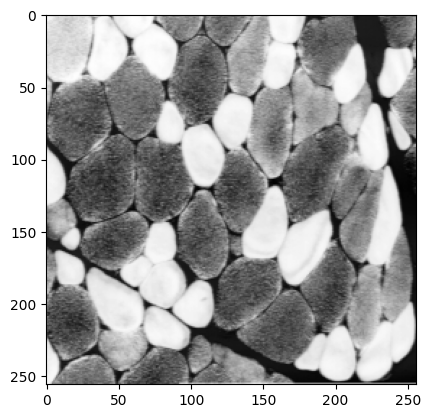

In [28]:
plt.imshow(imagen_muscle_NEG_2, cmap='gray')
plt.show()


Construimos la imagen en negativo con la metodología propuesta y con la función `cv2.bitwise_not`. En ambos resultados observamos la misma imagen. Los valores de los píxeles resultantes son el resultado de restar 255 con el valor de la intesidad en grises del pixel en MUSCLE.

## Ponga en cero, en la imagen muscle.png, los 6 bits menos significativos de la zona marcada por spot.png (blanca), sin afectar el resto de la imagen. Explique cómo hacerlo. Verifique que, en la imagen resultado, la zona marcada solo toma los cuatro valores: 192, 128, 64 y 0.

Primero creamos una máscara binaria de la zona blanca de spot (donde spot == 255).

In [ ]:
mascara_spot = (imagen_SPOT == 255).astype(np.uint8)

In [32]:
np.unique(mascara_spot)

array([0, 1], dtype=uint8)

Luego, creamos una máscara para anular los 6 bits menos significativos. Consideramos que 11000000 en binario es 192

In [34]:

mask_6bits = np.full(imagen_MUSCLE.shape, 192, dtype=np.uint8)


Cuantificamos la imagen muscle al anular los 6 bit menos significativos usando la operación bitwise AND.

In [35]:
muscle_cuantificado = cv2.bitwise_and(imagen_MUSCLE, mask_6bits)

Finalmente, usamos la función `np.where` para solo intervenir la imagen muscle en la sección donde la máscara binaria de spot (paso 1) es igual a 1.

In [36]:
imagen_resultado = np.where(mascara_spot == 1, muscle_cuantificado, imagen_MUSCLE)

Visualizamos el resultado y verificamos los valores únicos en la zona spot.

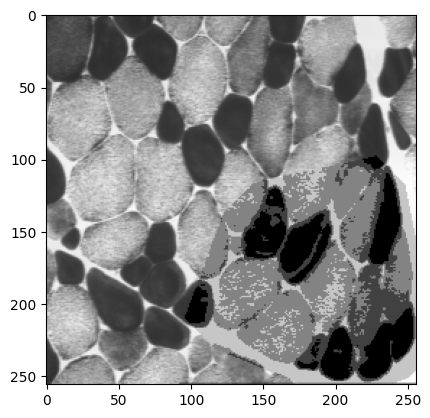

Valores únicos en la zona del spot: [  0  64 128 192]


In [ ]:
plt.imshow(imagen_resultado, cmap='gray')
plt.show()

valores_spot = imagen_resultado[imagen_SPOT == 255]
valores_unicos = np.unique(valores_spot)
print("Valores únicos en la zona del spot:", valores_unicos)